In [3]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
orders = pd.read_csv('data/purchase_order.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [5]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [8]:
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [12]:
orders[orders['Product'] == 'P0006944501']['Price'].mean()

1069.0

In [14]:
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [16]:
len(orders['Product'].unique())

20054

In [17]:
# select Product, avg(Price) from orders 
# group by Product limit 5

orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

In [22]:
# select Product, avg(Price) from orders 
# group by Product order by avg(Price) desc limit 5

orders.groupby('Product')['Price'].mean()\
.sort_values(ascending=False).head()

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [23]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']

In [25]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [28]:
#select User, sum(Total_Price) from orders
#gorup by User order by sum(Total_Price) desc limit 5

orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [29]:
import pandas as pd
m_cols = ['Time','Action','User','Product']
views = pd.read_csv('data/purchase_view.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
views.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [40]:
orders_cnt = orders.groupby(['User', 'Product'])['Product']\
.count().reset_index(name='buys')

In [42]:
views_cnt = views.groupby(['User', 'Product'])['Product']\
.count().reset_index(name='views')

In [44]:
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [46]:
views_cnt.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [47]:
merge_df = pd.merge(orders_cnt, views_cnt, on=['User','Product'], how='right')

In [49]:
merge_df.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1.0,2
1,U10000056953,P0013834251,1.0,7
2,U10000065461,P0023597022,1.0,1
3,U10000092625,P0023729451,1.0,14
4,U10000092625,P0024236730,1.0,4


In [51]:
views.head()

,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [53]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [61]:
# year, month, day, date, hour 
views['Dates'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: Dates, dtype: object

In [63]:
# select date, count(action) from views
# group by date
views_cnt_by_date  = views.groupby(views['Dates'].dt.date)['Action'].count()

In [66]:
?views_cnt_by_date.plot

Populating the interactive namespace from numpy and matplotlib


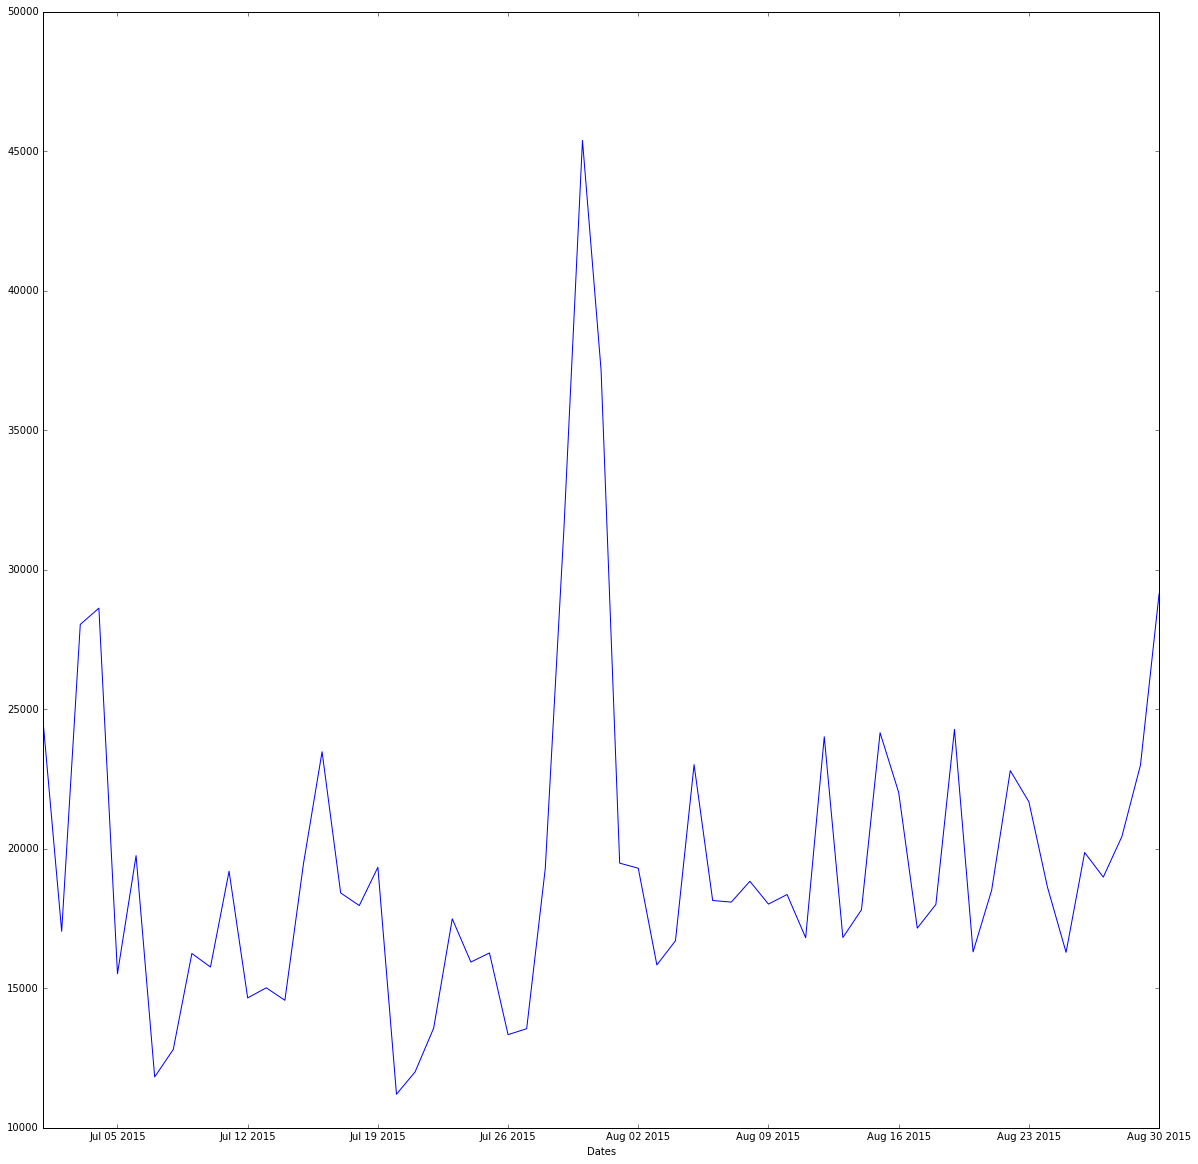

In [70]:
%pylab inline

views_cnt_by_date.plot(kind='line', figsize=[20,20])

In [71]:
views_cnt_by_hour  = views.groupby(views['Dates'].dt.hour)['Action'].count()

Populating the interactive namespace from numpy and matplotlib


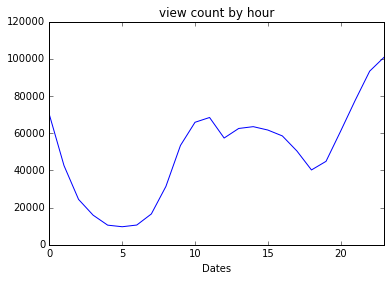

In [74]:
%pylab inline

views_cnt_by_hour.plot(kind='line', title = 'view count by hour')

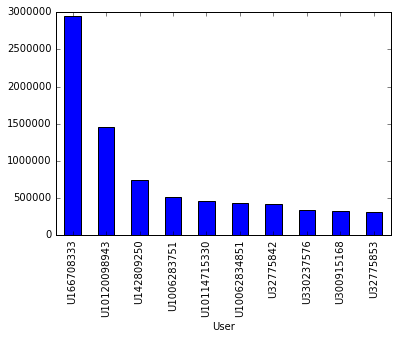

In [75]:
orders['Total_price'] = orders['Quantity'] * orders['Price']
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]
g.plot(kind="bar")


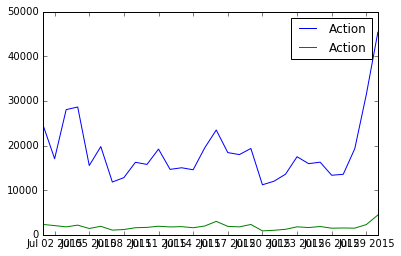

In [77]:
view_daily_cnt = views.groupby(by=views['Dates'].dt.date)['Action'].count()
orders_daily_cnt = orders.groupby(by=orders['Dates'].dt.date)['Action'].count()
df = pd.concat([view_daily_cnt, orders_daily_cnt], axis=1)
df.dropna(inplace=True)
df.plot(kind="line")


## 敘述性統計

In [78]:
import pandas.io.data as web
df = web.DataReader(name='2330.TW', data_source='yahoo',start='2000-1-1')


C:\Anaconda32\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [80]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,83.0813,83.0813,81.6811,83.0813,149083800,29.6180
2000-01-05,83.0813,84.9482,82.1478,84.9482,299016300,30.2836
2000-01-06,84.4815,84.9482,83.0813,83.0813,146768300,29.6180
2000-01-07,80.2809,81.6811,79.3474,80.7476,174796200,28.7861
2000-01-10,83.0813,84.0148,81.6811,83.5480,205184200,29.7844


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4191 entries, 2000-01-04 to 2016-08-31
Data columns (total 6 columns):
Open         4191 non-null float64
High         4191 non-null float64
Low          4191 non-null float64
Close        4191 non-null float64
Volume       4191 non-null int64
Adj Close    4191 non-null float64
dtypes: float64(5), int64(1)
memory usage: 229.2 KB


In [84]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,4191.000000,4191.000000,4191.000000,4191.000000,4.191000e+03,4191.000000
mean,76.812701,77.514078,76.067160,76.827982,5.511648e+07,60.911716
std,31.887725,32.023269,31.715732,31.894865,3.159564e+08,35.745673
min,32.201900,32.938000,32.109900,32.754000,0.000000e+00,20.446400
25%,55.203250,56.039700,54.665500,55.263000,3.145750e+07,36.723300
50%,63.943700,64.800000,63.200000,63.943700,4.316570e+07,45.685400
75%,91.000000,91.641400,90.041300,91.008000,6.138640e+07,73.568150
max,179.000000,179.500000,178.000000,179.500000,2.040451e+10,179.500000


In [91]:
import pandas
a = [40,35,100,55,50]
s = pandas.Series(a)
s.mean()

sum_of_series = s.sum() / s.count()

In [93]:
s.median()
s.sort_values()

1     35
0     40
4     50
3     55
2    100
dtype: int64

In [96]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,83.0813,83.0813,81.6811,83.0813,149083800,29.6180
2000-01-05,83.0813,84.9482,82.1478,84.9482,299016300,30.2836
2000-01-06,84.4815,84.9482,83.0813,83.0813,146768300,29.6180
2000-01-07,80.2809,81.6811,79.3474,80.7476,174796200,28.7861
2000-01-10,83.0813,84.0148,81.6811,83.5480,205184200,29.7844


In [99]:
df['Close'].mean()
df['Close'].median()

63.9437

In [101]:
import pandas
a = [40,35,100,55,50]
s = pandas.Series(a)
print(s.median())

50.0


In [103]:
print(s.quantile(0.25))
print(s.quantile(0.75))

40.0
55.0


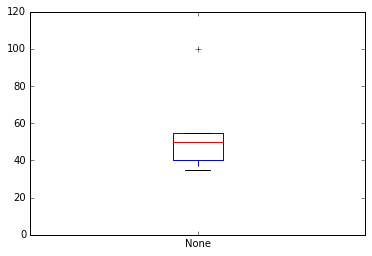

In [106]:
a = [40,35,100,55,50]
s = pandas.Series(a)
s.plot(kind='box', ylim=[0,120])

In [119]:
a = randint(low= 10, high=40, size=100)
print(mean(a))

b = a.tolist()
b.append(999)
b.append(999)
b.append(999)
s = pandas.Series(b)
print(s.mean())
#?randint

24.93
53.300970873786405


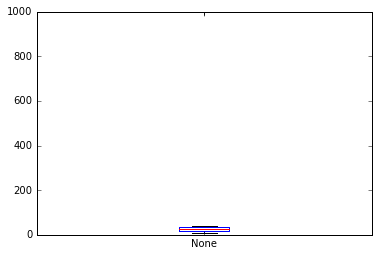

In [121]:
s.plot(kind='box')

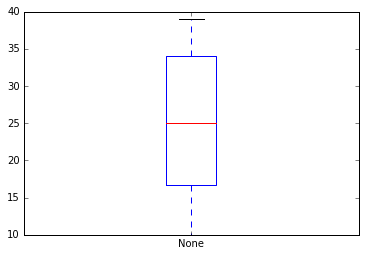

In [124]:
s[s < 100].plot(kind='box')

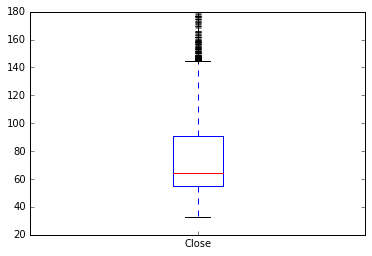

In [125]:
df['Close'].plot(kind='box')

In [127]:
df['Close'].head()

Date
2000-01-04    83.0813
2000-01-05    84.9482
2000-01-06    83.0813
2000-01-07    80.7476
2000-01-10    83.5480
Name: Close, dtype: float64

In [129]:
df[['Close', 'High', 'Open']].head()

,Close,High,Open
Date,,,
2000-01-04,83.0813,83.0813,83.0813
2000-01-05,84.9482,84.9482,83.0813
2000-01-06,83.0813,84.9482,84.4815
2000-01-07,80.7476,81.6811,80.2809
2000-01-10,83.5480,84.0148,83.0813


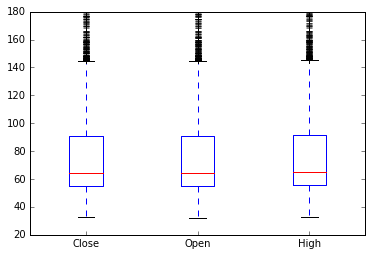

In [132]:
df[['Close', 'Open', 'High']].plot(kind='box')

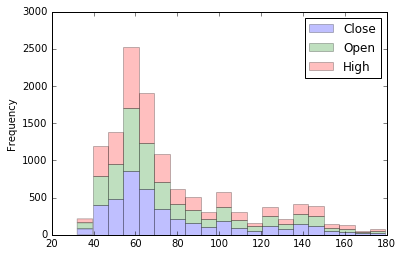

In [139]:
df[['Close', 'Open', 'High']].plot(kind='hist',alpha=0.25,stacked=True, bins=20)

In [135]:
?df.plot(kind='hist')

In [140]:
df.to_excel('123.xlsx')

## Linux 指令整理

## 安裝GIT
- https://git-scm.com/downloads

## 檢視當前目錄檔案
- ls 
- ls -lh (h 代表人類可解讀大小)

## 觀看檔案前幾行
- head page01.txt

## 計算檔案行數
- wc -l page01.txt 

## 切檔
- split -l 1000000 page01.txt

## 取出符合個數的列
- awk 'BEGIN{FS=","}{if(NF ==13) print $0}' xaa | iconv -c > yaa 

In [18]:
col = ['AttributionSequenceInSession', 'EventTimestamp', 'PageInstanceID',
       'PageLocation', 'PageLocationDomain', 'PageSequenceInAttribution',
       'PageSequenceInSession', 'PageTitle', 'ReferringPageInstanceID',
       'SessionNumber', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']

In [19]:
for l in 'abcdefg':
    print(l)

a
b
c
d
e
f
g


In [22]:
import pandas
df_lists = []
for l in 'abcdefg':
    if l == 'a':
        df = pandas.read_csv('bigdata/ya{}'.format(l), encoding = 'utf-8')
    else:
        df = pandas.read_csv('bigdata/ya{}'.format(l), header=None, encoding = 'utf-8')
        df.columns = col
    df_lists.append(df)

In [23]:
page01 = pandas.concat(df_lists)

In [24]:
page01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795332 entries, 0 to 804240
Data columns (total 13 columns):
AttributionSequenceInSession    int64
EventTimestamp                  object
PageInstanceID                  int64
PageLocation                    object
PageLocationDomain              object
PageSequenceInAttribution       int64
PageSequenceInSession           int64
PageTitle                       object
ReferringPageInstanceID         object
SessionNumber                   int64
TopLevelWindowID                object
TrackingUuid                    object
ProfileUiid                     object
dtypes: int64(5), object(8)
memory usage: 725.8+ MB
